In [ ]:
# 数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('netflix_titles.csv')
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
# 各字段说明：
# show_id 编号
# type 类型（Movie/TV Show）
# title 名称
# director 导演
# cast 演员
# country 国家或地区
# date_added 播放日期
# release_year 发行年份
# rating 限制级别
# duration 时长
# listed_in 类别
# description 描述

In [ ]:
# 观察影视剧数量分布


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS


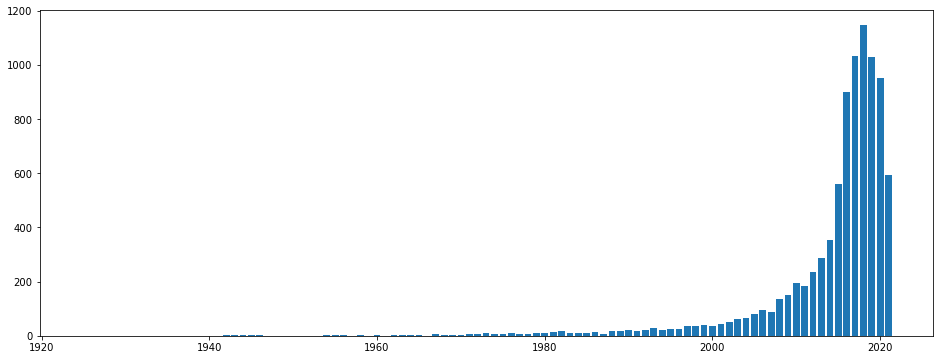

In [2]:
data = df['release_year'].value_counts().sort_index(ascending=False)
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(data.index, data.values)
plt.show()


In [3]:
# 2000年以前数据非常少，对分析没有价值，故只分析2000-2020年间的数据



In [4]:
# 处理空值、重复值


In [5]:
df = df.loc[(df.release_year <= 2020) & (df.release_year >= 2000)]
# 查看是否含有空值
df.isnull().sum()


show_id            0
type               0
title              0
director        2287
cast             709
country          599
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# director 和 cast 两列空值数据过多，不去管
# 由于Netflix是美国成立并且节目在美国放映，因此使用‘United States’填充‘country’空值数据
df['country'] = df['country'].fillna('United States')

# date_added 和 rating 两列空值数据只有21行，直接删除空行
df.dropna(subset=['date_added','rating'], axis=0, inplace=True)
# 重设索引
df.reset_index(drop=True, inplace=True)

# 查看是否含有重复数据
df.duplicated().sum()


0

In [8]:
# 处理文本类字段

In [16]:
# country列取第一个国家
df['country'] = df['country'].apply(lambda x: x.strip().split(',')[0])

# 添加month列
df['month'] = pd.to_datetime(df['date_added']).dt.month_name()

# listed_in列提取第一个类型
ls = []
for x in (np.arange(0,len(df))):
    ls.append(df['listed_in'][x].split(',')[0])
# 新增列“影视剧分类”
df['categories'] = ls
df['categories']

# 电影的duration列去掉字符串转为int型
# df.loc[df['type']=='Movie', 'duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]))
# 查看处理完的表
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,categories
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,Documentaries
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,United States,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,September,Documentaries
2,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,September,Crime TV Shows


In [17]:
# 数据分析
# 将电视节目和电影分成两表分别分析

In [18]:
tv_table = df[df['type'] == 'TV Show']
mv_table = df[df['type'] == 'Movie']


In [19]:
# 电影&电视节目发布量随年份的变化趋势


<function matplotlib.pyplot.show(close=None, block=None)>

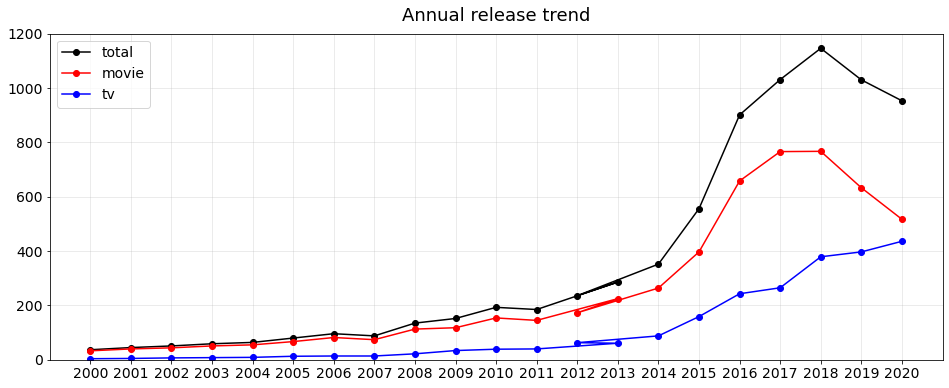

In [21]:
tv = tv_table['release_year'].value_counts()
mv = mv_table['release_year'].value_counts()
pubNum = pd.concat([tv, mv], axis=1, keys=['tv','mv'])

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(pubNum.index, pubNum['tv']+pubNum['mv'], label='total', marker='o', color='black')
ax.plot(pubNum.index, pubNum['mv'], label='movie', marker='o', color='red')
ax.plot(pubNum.index, pubNum['tv'], label='tv', marker='o', color='blue')
ax.legend(fontsize=14)
ax.set_xticks(range(2000,2021))
plt.tick_params(labelsize=14)
ax.grid(alpha=0.3)
ax.set_ylim(0,1200)
ax.set_title('Annual release trend', y=1.02, fontsize=18)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show


In [22]:
# 从2013年开始电影发布量呈上升趋势，其速度高于电视剧，在2015年增长速度最快。自2017达到最高后开始持续下降；
# 从2013年开始电视剧发布量稳步上升，在2017年速度最快，之后其上升速度低于电影量下降速度；
# 整体发行量趋势同电影，在2015年增速最大，到2018年后开始下降

In [23]:
# 电影&电视节目发布量随月份的变化趋势


Text(0.5, 1.02, 'monthly release trend')

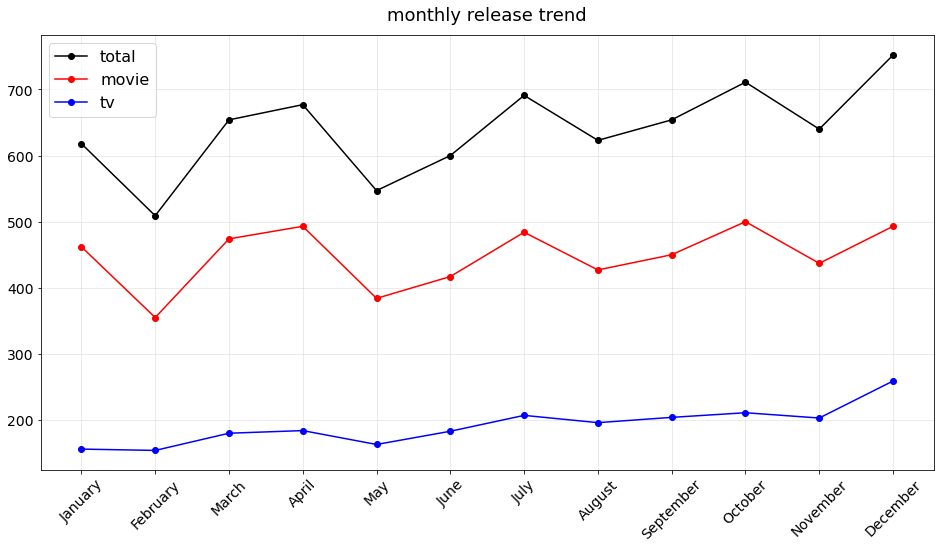

In [28]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_m = tv_table['month'].value_counts()[month_order].reset_index()
tv_m = tv_m.rename(columns={'month': 'count', 'index':'month'})
mv_m = mv_table['month'].value_counts()[month_order].reset_index()
mv_m = mv_m.rename(columns={'month': 'count', 'index':'month'})
All_m = df['month'].value_counts()[month_order].reset_index()
All_m = All_m.rename(columns={'month': 'count', 'index':'month'})

plt.figure(figsize=(16,8))
plt.plot(All_m['month'], All_m['count'], label='total', marker='o', color='black')
plt.plot(mv_m['month'], mv_m['count'], label='movie', marker='o', color='red')
plt.plot(tv_m['month'], tv_m['count'], label='tv', marker='o', color='blue')
plt.grid(alpha=0.3)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
plt.legend(fontsize=16)
plt.title('monthly release trend', fontsize=18, y=1.02)

In [29]:
# 电影在10月、12月和1月发行量最多，2月份发行量骤减到最少
# 电视剧呈现缓慢上升，相对平稳，也是2月份最少
# 月份对电影的影响较电视剧更大

In [30]:
# 电影&电视节目总发布数量对比


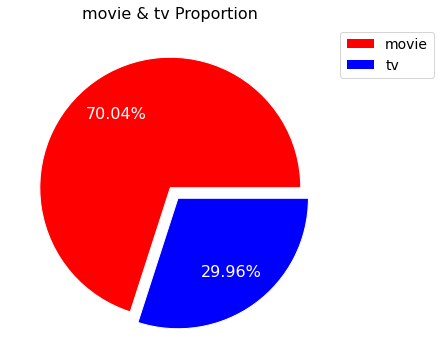

In [32]:
mvtv = df['type'].value_counts()
fig,ax = plt.subplots(figsize=(6,6))
ax.pie(mvtv, labels=['movie','tv'], autopct='%.2f%%', explode=[0,0.1], pctdistance = 0.7, colors=['red', 'blue'],\
       textprops={'fontsize':16, 'color':'white'}, wedgeprops={'width':1,'edgecolor':'white'})
ax.legend(bbox_to_anchor=(1, 0, 0, 1), fontsize=14)
ax.set_title('movie & tv Proportion', fontsize=16)
plt.show()


In [33]:
# 2000-2020年，电影的产出是电视剧的两倍多


In [34]:
# 不同限制级别的发行量分布
# 影视剧分级规则：
# 儿童
# G：大众级，任何人都可观看
# TV-G：普遍级的电视节目，适合所有年龄层观看
# TV-Y：适合包括2-6岁幼童在内的所有儿童观看的节目
# TV-Y7：可能含有年龄7岁以下儿童不宜观看内容的电视节目
# TV-Y7-FV：是TV-Y7的替代版本。当电视节目中含有相较于TV-Y7级别来说更多的虚构暴力画面时，会被评为TV-Y7-FV
# 青少年
# PG：辅导级，电影中的一些内容可能不适合儿童观看
# TV-PG：指“建议家长提供指引”的电视节目。有些内容可能不适合儿童，可能有少量的暴力、性题材和不当行为
# PG-13：特别辅导级，建议13岁后儿童观看
# TV-14：可能不适合于14岁以下未成年人收看
# 成人
# R：限制级，建议17岁以上观看
# TV-MA：电视节目可能含有不适合17岁以下未成年人或只适合成年观众收看的内容
# NC-17：17岁及以内禁止观看
# 未经定级
# NR
# UR


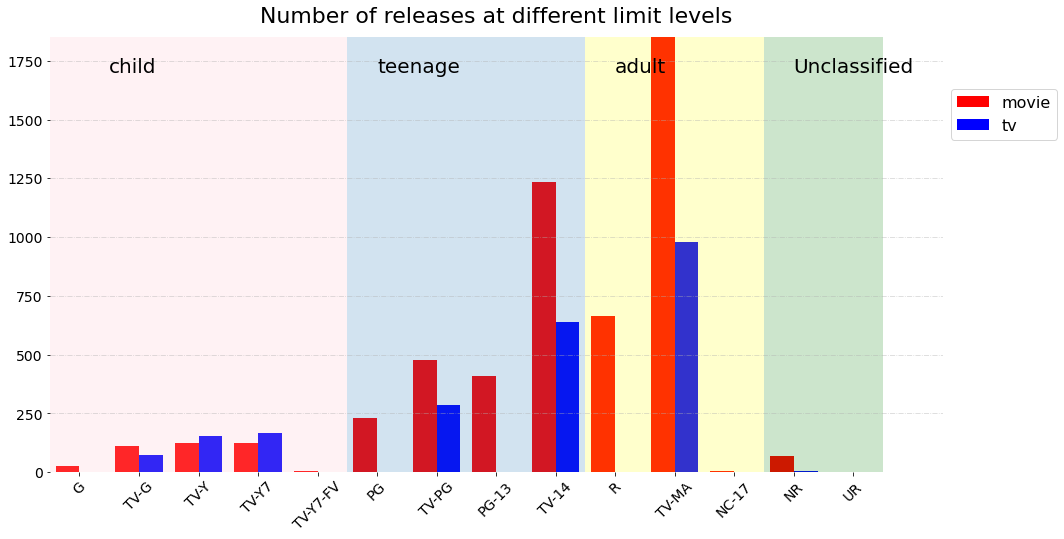

In [37]:
# 美国电影、电视节目按限制年龄从小到大排序的限制级别
rating_order_mv = ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV','PG', 'TV-PG', 'PG-13', 'TV-14', 'R',  'TV-MA', 'NC-17', 'NR', 'UR']
rating_order_tv =  ['TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA', 'NR']

tv_r = tv_table['rating'].value_counts()[rating_order_tv]
mv_r = mv_table['rating'].value_counts()[rating_order_mv]
rating = pd.concat([mv_r, tv_r], axis=1, keys=['mv_r', 'tv_r']).fillna(0).astype('int')

plt.figure(figsize=(16,8))
plt.bar(np.arange(0,len(rating))-0.2, height=rating['mv_r'], width=0.4, label = 'movie', color='red')
plt.bar(np.arange(0,len(rating))+0.2, height=rating['tv_r'], width=0.4, label = 'tv',color='blue')
plt.bar(np.arange(0, 5), height=1900, width=1, alpha=0.2, color='pink')
plt.bar(np.arange(5, 9), height=1900, width=1, alpha=0.2)
plt.bar(np.arange(9, 12), height=1900, width=1, alpha=0.2, color='yellow')
plt.bar(np.arange(12, len(rating)), height=1900, width=1, alpha=0.2, color='green')
plt.text(0.5, 1700, 'child', fontsize=20)
plt.text(5, 1700, 'teenage', fontsize=20)
plt.text(9, 1700, 'adult', fontsize=20)
plt.text(12, 1700, 'Unclassified', fontsize=20)
plt.grid(axis='y', ls='-.', alpha=0.5)
plt.legend(fontsize=16, bbox_to_anchor=(1,0.9))
plt.xticks(np.arange(0,len(rating)), labels=rating.index, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1850])
plt.xlim([-0.5,len(rating)+0.5])
plt.xlabel('', fontsize=22)
plt.ylabel('', fontsize=22)
plt.title('Number of releases at different limit levels', fontsize=22, y=1.02)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.show()


In [39]:
# 过去20年， 不论是电影还是电视剧，面向青少年和成人的节目较于儿童更多些
# TC-MA、TV-14、R级别的电影发布数量较多（>500)
# TC-MA、TV-14级别的电视剧发布数量较多(>500)

In [41]:
# 不同分类的发布量

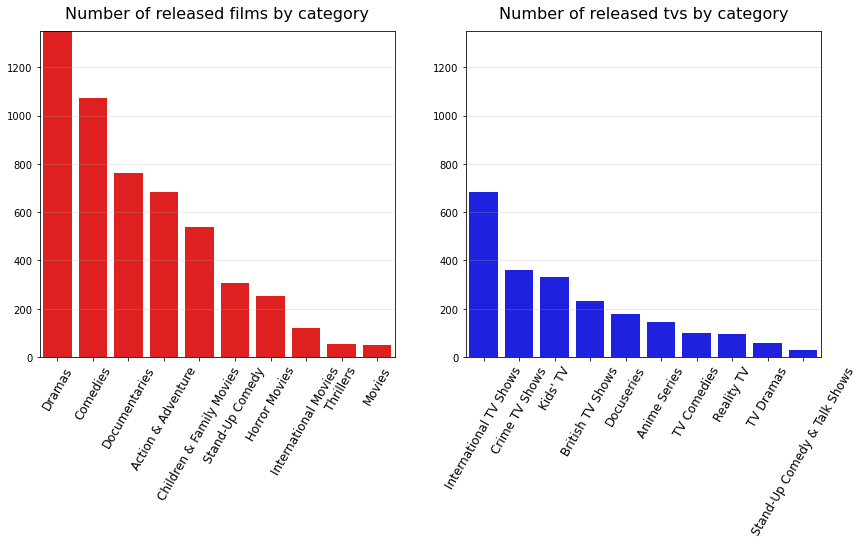

In [43]:
# 电视节目各分类作品数量
tv_ctg = tv_table['categories'].value_counts()
tv_ctg = pd.DataFrame({'categories': tv_ctg.index, 'count': tv_ctg.values}).head(10)
# 电影各分类作品数量
mv_ctg = mv_table['categories'].value_counts()
mv_ctg = pd.DataFrame({'categories': mv_ctg.index, 'count': mv_ctg.values}).head(10)

plt.figure(figsize=(14,6))
plt.subplot(121)
sns.barplot(x=mv_ctg['categories'], y=mv_ctg['count'], color='red')
plt.title('Number of released films by category', fontsize=16, y=1.02)
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0,1350])
plt.subplot(122)
sns.barplot(x=tv_ctg['categories'], y=tv_ctg['count'], color='blue')
plt.title('Number of released tvs by category', fontsize=16, y=1.02)
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0,1350])
plt.show()

In [44]:
# 电影类别中剧情类、喜剧类发布数量最多，超过1000；纪录、动作冒险类发布量超500
# 电视节目类别中国际电视节目放映数量最多，是其他类别的两倍之多；犯罪、儿童类发布量超300

In [45]:
# 不同国家地区的发布数量分布

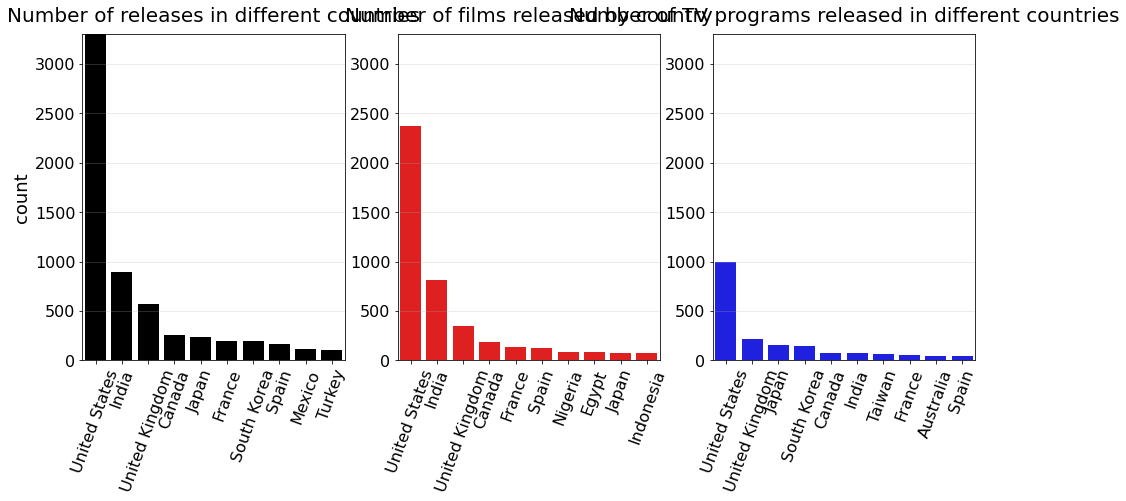

In [47]:
# 电视节目各国家发布量
tv_c = tv_table['country'].value_counts()
tv_c = pd.DataFrame({'country': tv_c.index, 'count': tv_c.values}).head(10)
# 电影各国家发布量
mv_c = mv_table['country'].value_counts()
mv_c = pd.DataFrame({'country': mv_c.index, 'count': mv_c.values}).head(10)
# 各国家发布总量
all_c = df['country'].value_counts()
all_c = pd.DataFrame({'country': all_c.index, 'count': all_c.values}).head(10)

plt.figure(figsize=(16,6))
plt.subplot(131)
sns.barplot(x=all_c['country'], y=all_c['count'], color='black')
plt.title('Number of releases in different countries', fontsize=20, y=1.02)
plt.xticks(rotation=70, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('', fontsize=18)
plt.ylabel(all_c.columns[1], fontsize=18)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0,3300])
plt.subplot(132)
sns.barplot(x=mv_c['country'], y=mv_c['count'], color='red')
plt.title('Number of films released by country', fontsize=20, y=1.02)
plt.xticks(rotation=70, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('', fontsize=18)
plt.ylabel(ylabel='', fontsize=18)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0,3300])
plt.subplot(133)
sns.barplot(x=tv_c['country'], y=tv_c['count'], color='blue')
plt.title('Number of TV programs released in different countries', fontsize=20, y=1.02)
plt.xticks(rotation=70, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0,3300])
plt.show()


In [48]:
# 由于Netflix成立于美国，所以出自美国的影视剧数量远超其他国家
# 印度电影发布数量较多，英国电影、电视节目发布量比较平均

In [49]:
# 电影时长分布


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '90 min'

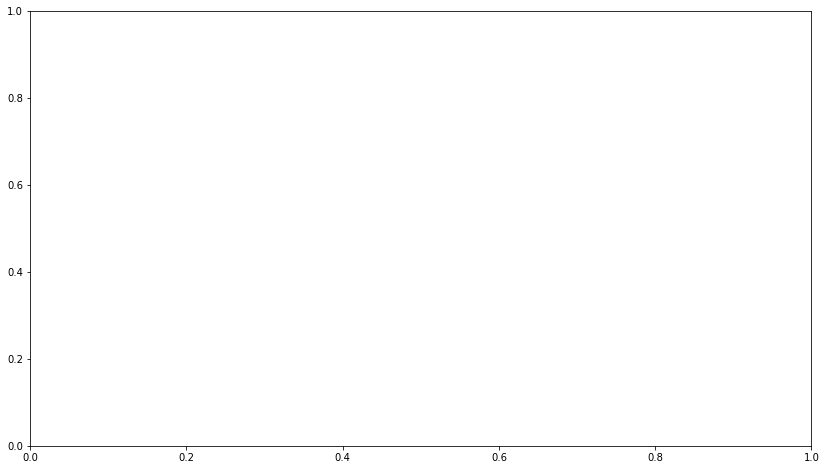

In [50]:
plt.figure(figsize=(14,8))
sns.distplot(mv_table['duration'])
plt.xticks(np.arange(0,350,10), fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,220)
plt.xlabel(xlabel='电影时长', fontsize=14)
plt.title('电影时长分布图', fontsize=18, y=1.02)
plt.show()


In [51]:
# 查看各导演作品数量

In [52]:
len(tv_table['director'])
tv_table['director'].isnull().sum()


2117

In [53]:
# 电视节目表中一共2332条数据，有2152条导演值缺失



In [54]:
len(tv_table['director'])
mv_table['director'].isnull().sum()


157

In [56]:
# 电影节目表中一共4958条数据，导演列缺失153条数据
# 电视剧导演的缺失太多，这里只分析电影的导演作品数量

In [57]:
director = mv_table['director'].value_counts().head(10)
director = pd.DataFrame({'director': director.index, 'count': director.values})
director


,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Don Michael Paul,10
8,Hakan Algül,8
9,Shannon Hartman,8


Text(0.5, 1.02, 'Ranking of the number of film directors released')

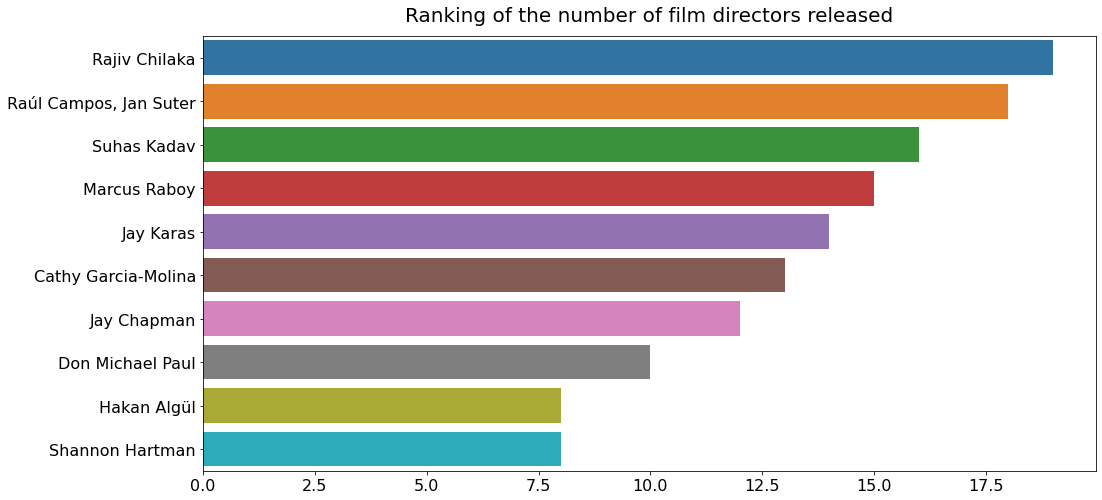

In [59]:
plt.figure(figsize=(16,8))
sns.barplot(x=director['count'],y=director['director'], orient="h")
plt.xlabel('')
plt.ylabel('',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Ranking of the number of film directors released', y=1.02, fontsize=20)


In [60]:
# Raúl Campos, Jan Suter导演发布量最多，20年发布18部电影，平均大约一年一部


In [61]:
# 关键词

In [62]:
from wordcloud import WordCloud
text = str(list(df['description'])).replace(',', '').replace("'", '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 900,  height = 500, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# 影视剧更多地围绕生活、寻找、家庭、世界、朋友、爱等相关标签展开
# 总结：
# 2000-2020过去20年里，电影的发布量是电视节目的两倍多；从2013年发布量迅速增多，到2017年电影发行量大幅下降，而电视节目却稳步上升；说明Netflix越来越关注电视节目的放映；
# 电影在10月、12月、1月放映量较多，可能是大学生放寒假以及12月底的圣诞节全国假期导致，2月份的骤减可能由于大学生开学引起；可以得出在长假期下放映电影会有更多人观看，也能看出电影的受众大多是青少年及成年人；电视节目相比之下不那么受假期的影响；
# 从不同限制级别的放映量可以证实电影和电视节目的内容更适合青少年和成年人观看，因为Netflix有移动端、PC端及TV等载体，成年人和青少年更倾向于移动端而儿童会倾向于TV，所以电视节目相比于电影会更多面向儿童；
# 人们更倾向于剧情、喜剧类的电影和国际类的电视节目；
# 电影时长大多分布在90-110min间，可知人们观影最佳时长应该是90-110min，在这个时间段内观影体验和效果最好；
# 人们更倾向于生活、寻找、家庭、世界、朋友、爱等相关主题的电影和电视节目。